In [19]:
#Q1) Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.


import pandas as pd

# Read the dataset (replace 'bike_details.csv' with your actual file name/path)
df = pd.read_csv("/content/BIKE DETAILS.csv")

# Display first 10 rows
print(df.head(10))

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [22]:
#Q2) Check for missing values in all columns and describe your approach for handling them.

import pandas as pd

df = pd.read_csv("/content/BIKE DETAILS.csv")

print("Missing values summary:")
print(df.isnull().sum())
print("\nMissing percentage:")
print((df.isnull().mean() * 100).round(2))

df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

print("\nAfter handling missing values:")
print(df.isnull().sum())


Missing values summary:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing percentage:
name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64

After handling missing values:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-1680605399.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


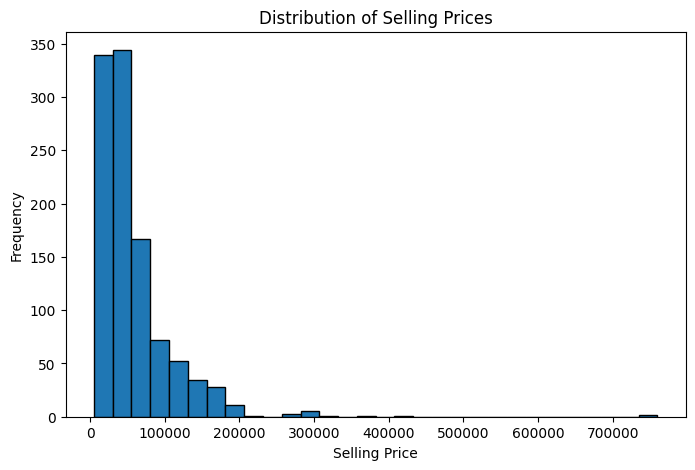

Mean Selling Price: 59638.151743638075
Median Selling Price: 45000.0
Mode Selling Price: 25000


In [23]:
#Q3) Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt

# Histogram of selling prices
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

# Mean, Median, Mode
mean_price = df['selling_price'].mean()
median_price = df['selling_price'].median()
mode_price = df['selling_price'].mode()[0]

print("Mean Selling Price:", mean_price)
print("Median Selling Price:", median_price)
print("Mode Selling Price:", mode_price)


/tmp/ipython-input-4152061924.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='seller_type', y='selling_price', estimator=np.mean, ci=None)


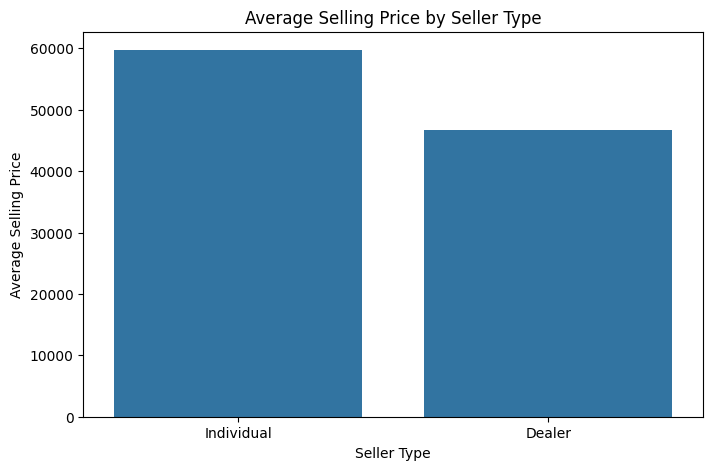

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [25]:
#Q4) Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bar plot of average selling price by seller_type
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='seller_type', y='selling_price', estimator=np.mean, ci=None)
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.show()

# Calculate average selling price by seller_type
avg_prices = df.groupby('seller_type')['selling_price'].mean()
print(avg_prices)


Average km_driven by ownership type:
owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


/tmp/ipython-input-1152045558.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_km.index, y=avg_km.values, palette="viridis")


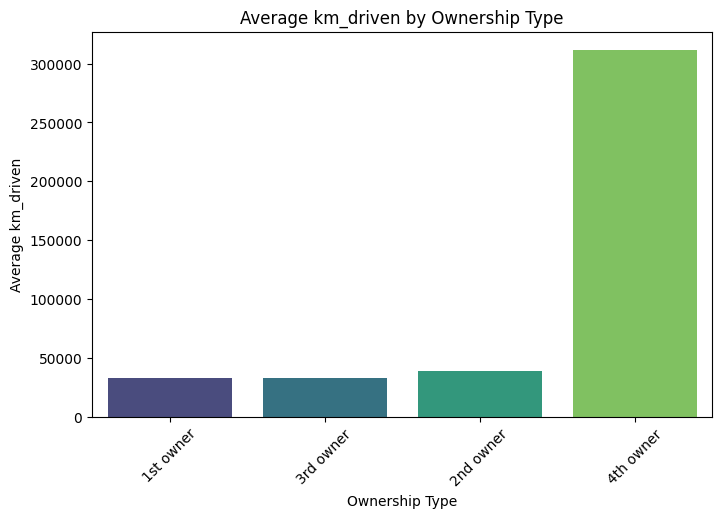

In [27]:
#Q5) Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean().sort_values()

print("Average km_driven by ownership type:")
print(avg_km)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=avg_km.index, y=avg_km.values, palette="viridis")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.title("Average km_driven by Ownership Type")
plt.xticks(rotation=45)
plt.show()


In [28]:
#Q6)  Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

import pandas as pd

# Summary statistics before removing outliers
print("Before removing outliers:")
print(df['km_driven'].describe())

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


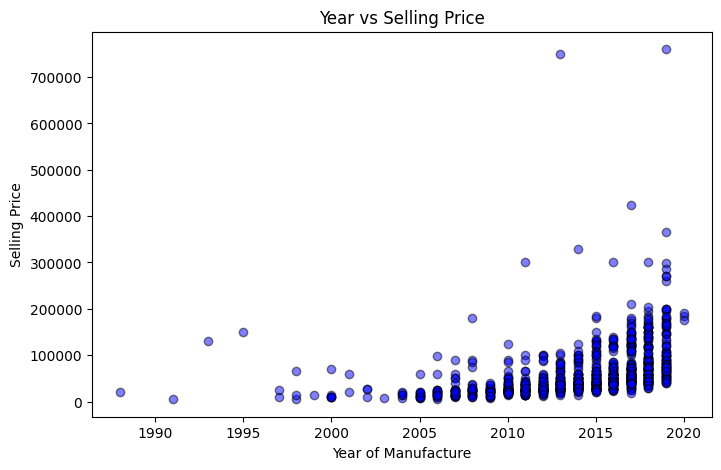

In [29]:
#Q7) Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

import matplotlib.pyplot as plt

# Scatter plot of year vs selling_price
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, c='blue', edgecolor='k')
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.show()


In [30]:
#Q8) Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

import pandas as pd

# One-hot encode the seller_type column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows of the new DataFrame
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350            72752.5               False                    True  
1       5650            72752.5               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000            72752.5               False                    True  


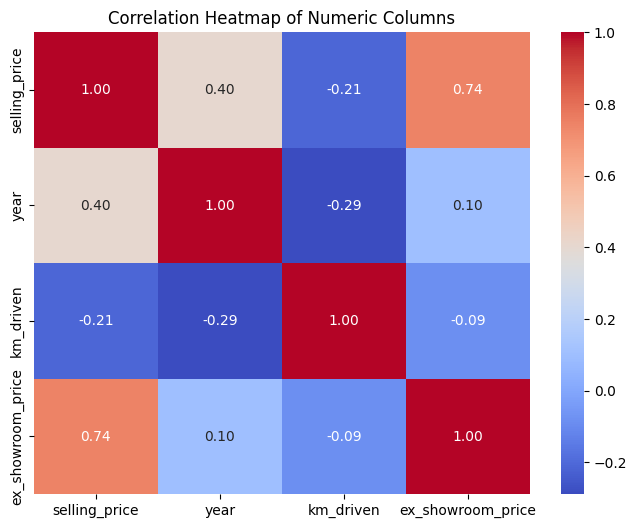

In [31]:
#Q9) Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


Q10) Summarize your findings in a brief report:
 What are the most important factors affecting a bike's selling price?
 Mention any data cleaning or feature engineering you performed.

Ans10)

    1. Key Factors Affecting Selling Price

      Year of Manufacture:
      Newer bikes have higher selling prices, while older bikes tend to depreciate in value.

      Ex-showroom Price:
      Shows a strong positive correlation with selling price (premium models retain higher resale value).

      Kilometers Driven:
      Higher usage (more km driven) generally reduces the selling price, though the effect is weaker compared to year and showroom price.

      Seller Type:
      Dealers typically list bikes at a higher average price compared to individuals, reflecting newer or better-maintained stock.

      Ownership Type:
      First-owner bikes usually command higher resale values, while bikes with multiple previous owners show lower average prices.

    2. Data Cleaning Performed

      Handled Missing Values:

      Found 41% missing values in ex_showroom_price.

      Imputed with the median to retain this important feature.

      Removed Outliers:

      Applied the IQR method on km_driven to filter unrealistic high-mileage records.

      Encoding Categorical Variables:

      Converted seller_type into numeric format using one-hot encoding for analysis/modeling.

      Checked Data Types:

      Ensured categorical and numeric columns were properly formatted for analysis.

      3. Feature Engineering

      Created one-hot encoded features for categorical variables (seller_type).

      Derived insights from summary statistics (mean, median, mode) to handle skewed distributions in selling price.